##### Introduction

In the lecture for this week I talked about using the ```seaborn FacetGrid``` function to create a ['data aware'](http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html) grid to plot on. The example in the presentation and in the notebook was rather trivial - simply splitting data by male and female for plotting. Where faceting really shines however is when you have more complex multivariate data structures to plot.

In this example we'll look at real data from course results over the School of Sport degree programme. Our dataset (module_grades.tsv) has 6 variables.

* year - the year the mark was recorded
* module - the module the mark was recorded on
* programme - the programme the student was following
* science - a [dummy variable](http://www.stata.com/support/faqs/data-management/creating-dummy-variables/) indicating whether the student was  Sports and Exercise Science student or not
* grade - the old grade the student received
* mark - the mark (out of 20) the grade relates to

In this notebook we'll demonstrate the power of faceting by plotting the marks across years and programmes for each module. Hopefully you'll see the power of getting ```seaborn``` to do the heavy lifting so you don't have to write boilerplate code to do the cutting up manually. Also this example should illustrate how easy it is do do this kind of task programmatically. If you had to do this in e.g. Excel you would have to manually create a plot for each facet. How dull - you could be reading [Mr Gum](http://www.mrgum.co.uk/)!

## Onwards & upwards

First we set up our environment (load the libraries we need) and get the data (which you'll find in the data folder on GitHub or as a tsv file on the Succeed page in Teaching materials -> Week7).

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import pandas as pd

dataF = pd.read_csv('data/module_grades.tsv', delimiter = '\t')
dataF = dataF.sort_values(by=['year', 'module'], ascending = [1,1]) # sort the dataframe, ascending by year, module 
dataF.head()

,year,module,programme,science,grade,mark
177,2010,SPS915,Bachelor of Arts with Honours in Sports Studie...,0,2B,14
292,2010,SPS915,Bachelor of Science with Honours in Sport and ...,1,2C,13
366,2010,SPS915,Bachelor of Arts with Honours in Sports Studies,0,2D,12
367,2010,SPS915,Bachelor of Arts with Honours in Sports Studies,0,2D,12
506,2010,SPS915,Bachelor of Arts with Honours in Sports Studies,0,2E,11


As you can see this data is already in long format. Each row corresponds to one and only one outcome of interest (mark). We've sorted the data by ```year``` and ```module``` (both ascending).

We'll now set up our ```FacetGrid``` with years across rows, modules across columns and colour representing science.

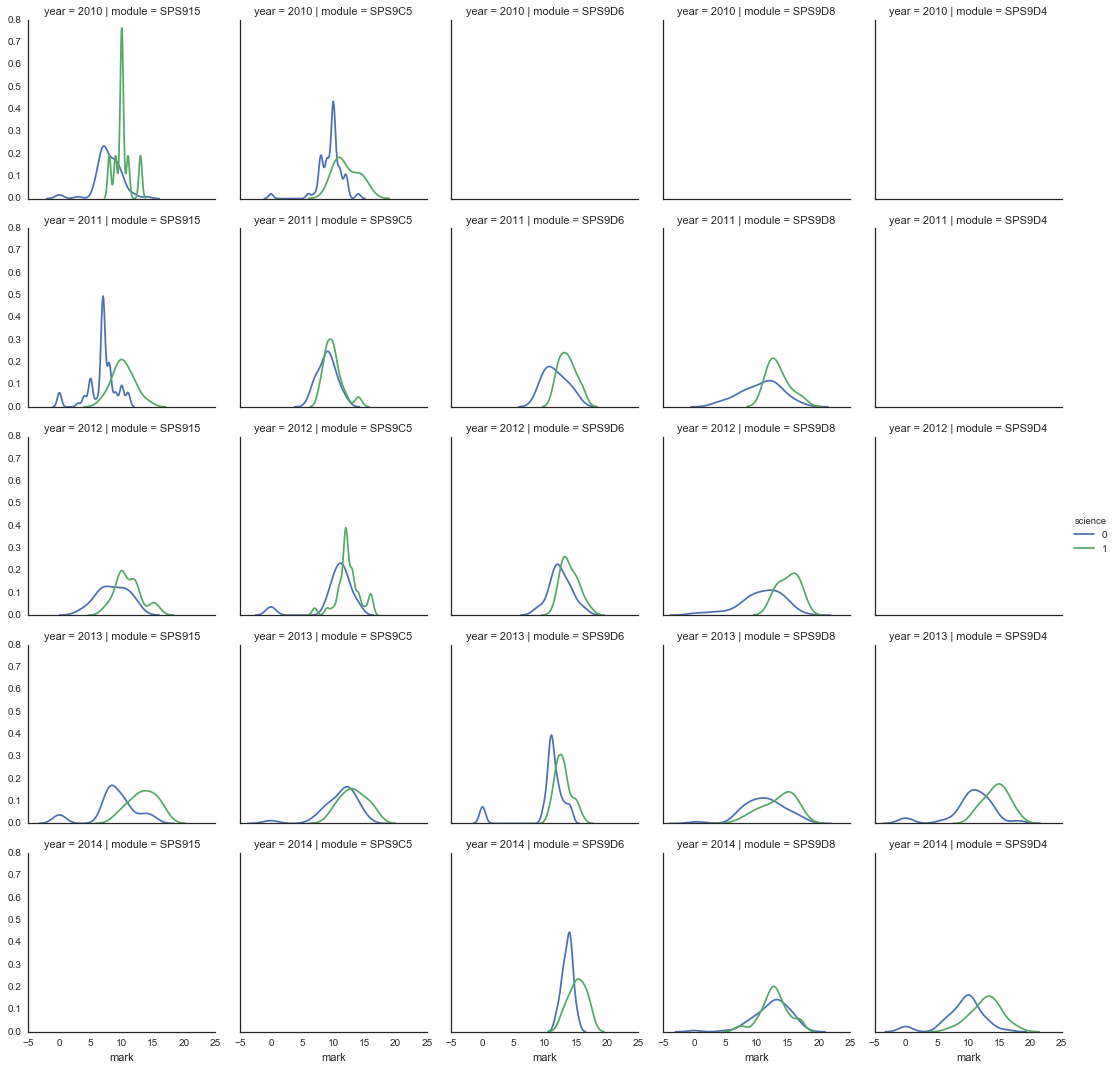

In [2]:
fg = sns.FacetGrid(dataF, row = 'year', col = 'module', hue = 'science') # set up the grid
fg.map(sns.distplot, 'mark', hist=False) # map the distplot function to the grid, no histogram i.e. curves only
fg.add_legend() # which colour is which
plt.show()

Sweet! In four lines of code we've cut up our data set and generated plots for each combination of the variables we wanted to look at. For some years there are no data and ```seaborn``` sensibly leaves those blank. If you pick a column and go down the rows you'll see the evolution of the mark distribution for the two groups (science and non-science) over time. The science students tend to do comparatively well in D4, D6, D8 (until 2014, when the rules changed incidentally) and 915. The groups are more evenly matched in C5.

Ok, fine and dandy but rather like split-apply-combine this a such a useful concept that it's worth seeing another example. In fact let's use an example with a split-apply-combine element. We'll calculate the mean mark for each group in each module by year and then we'll plot those as barplots.

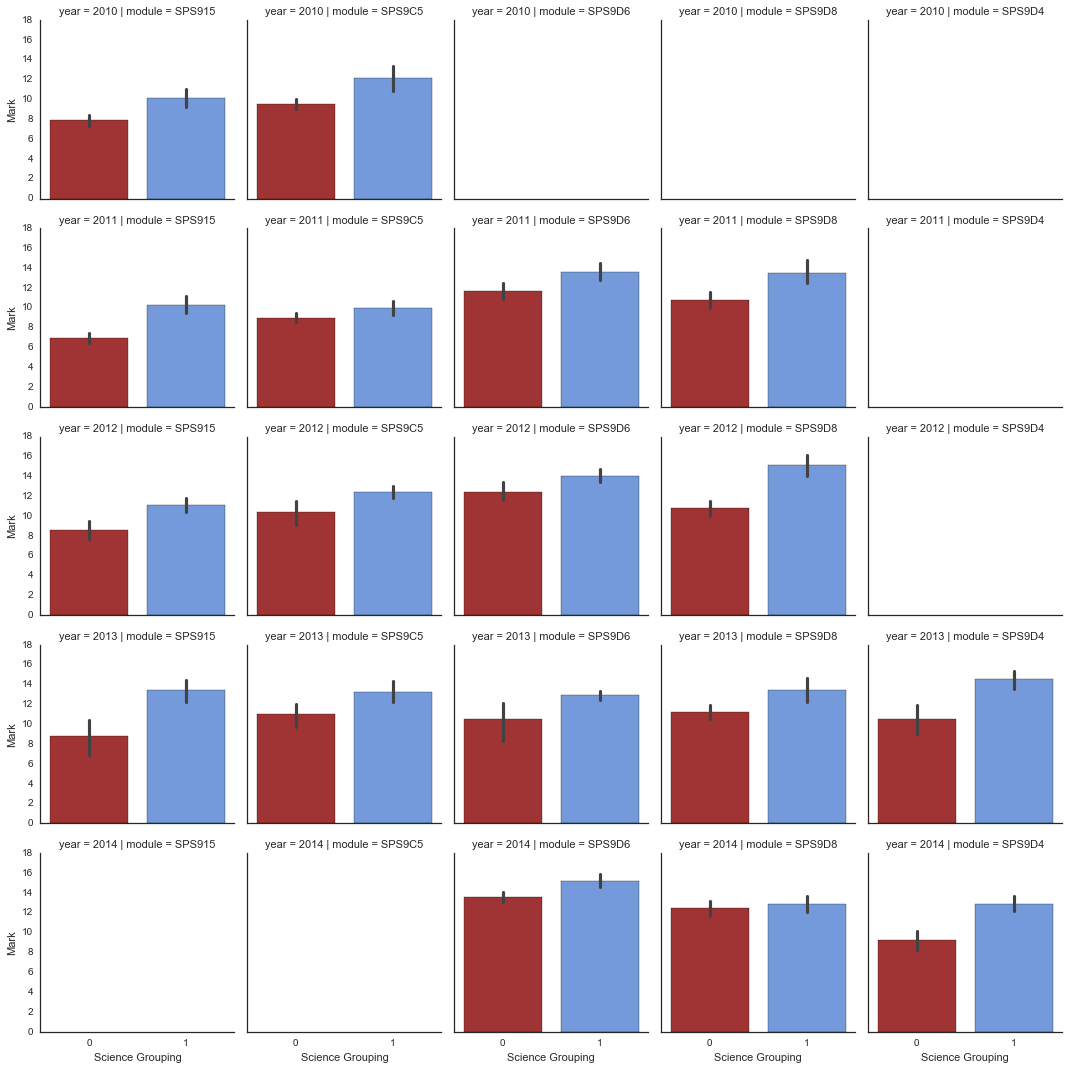

In [3]:
bfg = sns.FacetGrid(dataF, row = 'year', col = 'module') # set up the grid
# note how we add group specific colours in barplot below
# colours? see here http://html-color-codes.info/color-names
bfg.map(sns.barplot, 'science', 'mark', ci=95, palette=["firebrick", "cornflowerblue"]) 
bfg.set_axis_labels('Science Grouping', 'Mark') # adding axis labels to faceted plot
plt.show()